# Roberto Carlos Gómez Donis - 202000544
## **Limpieza de datos**
En esta fase, se lleva a cabo la depuración del archivo, descartando la información innecesaria y eliminando columnas que no serán útiles para nuestro análisis. Además, se ajustan los datos para que estén listos para su procesamiento en las etapas posteriores.
## Cargar y formatear datos (formatearDatos)
En esta fase hace las limpiezas necesarias, como volver la columna *Rating* a valores numéricos, convierte los valores de *Duration* a float y por ultimo en *Review* elimina las comas, extrayendo solamente los números (tambien haciendo el casteo a float).
## Mostrar resultados (mostrarResultados)
Aca encuentra el curso con la mejor y peor calificación y los imprime. Tambien calcula el porcentaje de cursos que tienen horarios flexibles (usando la columna Schedule para verificar si el valor es Flexible schedule) y muestra ese porcentaje.
## Calcular promedios de calificaciones (obtenerPromedios)
En esta etapa se calculan los promedios por curso.
## Procesamiento de texto con nltk
En esta fase, se utiliza la biblioteca nltk para realizar varias tareas de procesamiento de lenguaje natural. Además, se realiza un análisis de frecuencia de palabras para identificar las más comunes en el conjunto de datos.


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tree import Tree

dataFrameCursos = pd.read_csv('./Datos.csv')

def formatearDatos(df):
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)
    df['Review'] = df['Review'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

    return df

def mostrarResultados(promedioDf):
    cursoMejorCalificacion = promedioDf.iloc[0]['Course Title']
    cursoPeorCalificacion = promedioDf.iloc[-1]['Course Title']
    print(f"Curso con calificación más alta: {cursoMejorCalificacion}")
    print(f"Curso con calificación más baja: {cursoPeorCalificacion}")

    totalCursos = len(dataFrameCursos)
    cursosFlexibles = len(dataFrameCursos[dataFrameCursos['Schedule'] == 'Flexible schedule'])
    porcentajeFlexibles = (cursosFlexibles / totalCursos) * 100
    porcentajeFlexibles = round(porcentajeFlexibles, 2)
    print(f"Porcentaje de cursos con horarios flexibles: {porcentajeFlexibles}%")

def obtenerPromedios(df):
    return df.groupby('Course Title')['Rating'].mean().dropna().sort_values(ascending=False)

# Cargar y limpieza de datos (datos.csv)
dataFrameCursos = formatearDatos(dataFrameCursos)

# Calcular los promedios de las calificaciones

promedio = obtenerPromedios(dataFrameCursos)

promedioDataFrame = promedio.reset_index()


# Recursos de nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

ruta_archivo = "./Coursera Comments.txt"
# Leer el archivo de texto plano (Coursera Comments.txt)
with open(ruta_archivo, 'r', encoding='utf-8') as file:
    text = file.read()

sentences = sent_tokenize(text)
words = word_tokenize(text.lower())
stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
word_df = pd.DataFrame(lemmatized_words, columns=['word'])
word_freq = word_df['word'].value_counts().reset_index()
word_freq.columns = ['word', 'frequency']
top_words = word_freq.head(15)
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(sentence) for sentence in sentences]

def obtener_entidades(texto):
    tokens = word_tokenize(texto)  
    etiquetas = nltk.pos_tag(tokens)     
    arbol = nltk.ne_chunk(etiquetas)     
    entidades = []
    
    for subtree in arbol:
        if isinstance(subtree, Tree):  
            entidad = " ".join([token for token, pos in subtree.leaves()])
            etiqueta = subtree.label()  
            entidades.append((entidad, etiqueta))
    
    return entidades

def procesar_por_bloques(ruta, bloque_size=8000):
    entidades = []
    with open(ruta, 'r', encoding='utf-8') as archivo:
        bloque = []

        for i, linea in enumerate(archivo):
            bloque.append(linea.strip())
            if (i + 1) % bloque_size == 0:
                entidades += obtener_entidades(" ".join(bloque))
                break

        if bloque:
            entidades += obtener_entidades(" ".join(bloque))

    return entidades


# Procesar las entidades
entidades = procesar_por_bloques(ruta_archivo)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Roberto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up

# **Resultados obtenidos (datos.csv)**

In [69]:
print("Promedio de las calificaciones:")
promedioDataFrame

Promedio de las calificaciones:


,Course Title,Rating
0,Programa especializado en circuitos eléctricos...,5.0
1,Keamanan IT: Pertahanan terhadap Kejahatan Dig...,5.0
2,Road to the CISO – Culminating Project Course,5.0
3,Keller Williams Real Estate Agent Professional...,5.0
4,"Question Reality! Science, philosophy, a searc...",5.0
...,...,...
5140,Mediation Analysis with R,2.5
5141,Data Cleaning in Snowflake: Techniques to Clea...,2.5
5142,Build automated speech systems with Azure Cogn...,1.5
5143,Excel for Beginners: Beginner Functions,1.5


In [70]:
mostrarResultados(promedioDataFrame)

Curso con calificación más alta: Programa especializado en circuitos eléctricos con SPICE Specialization
Curso con calificación más baja: Build a computer vision app with Azure Cognitive Services
Porcentaje de cursos con horarios flexibles: 92.88%


### **Conclusión**

El análisis de las calificaciones revela que varios cursos han recibido una puntuación de *5.0*, lo que indica que los estudiantes están altamente satisfechos con su contenido y estructura. Entre estos cursos destacan *Programa especializado en circuitos eléctricos con SPICE Specialization* y *Keamanan IT: Pertahanan terhadap Kejahatan Digital*. En el otro extremo, algunos cursos, como *Build a computer vision app with Azure Cognitive Services* y *Excel for Beginners: Beginner Functions*, obtuvieron una calificación de *1.5*, lo que sugiere un nivel de insatisfacción, posiblemente debido a problemas con el contenido o la enseñanza. Además, se observa que un 92.88% de los cursos ofrecen horarios flexibles, lo que es un factor positivo para los estudiantes que necesitan adaptar su aprendizaje a sus propias agendas.


# **Cursos Distribuidos por nivel de dificultad**

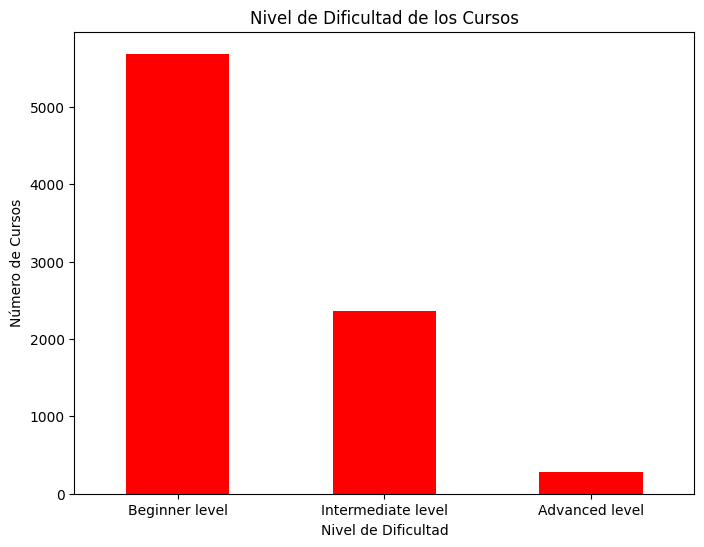

In [71]:
plt.figure(figsize=(8,6))
dataFrameCursos['Level'].value_counts().plot(kind='bar', color='red')
plt.title('Nivel de Dificultad de los Cursos')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=0)
plt.show()

### **Conclusión (Número de Cursos vs Nivel de Dificultad)**

Los cursos muestran que la mayoría están diseñados para principiantes, lo que asegura que sean fácilmente accesibles para la mayoría de los estudiantes. Por otro lado, hay una buena cantidad de cursos de nivel intermedio, proporcionando opciones para quienes buscan un desafío moderado. En cuanto a los cursos de nivel avanzado, son menos frecuentes, lo que indica que podrían estar dirigidos a un público más reducido y especializado. 

# **Número de Cursos por Categoría**

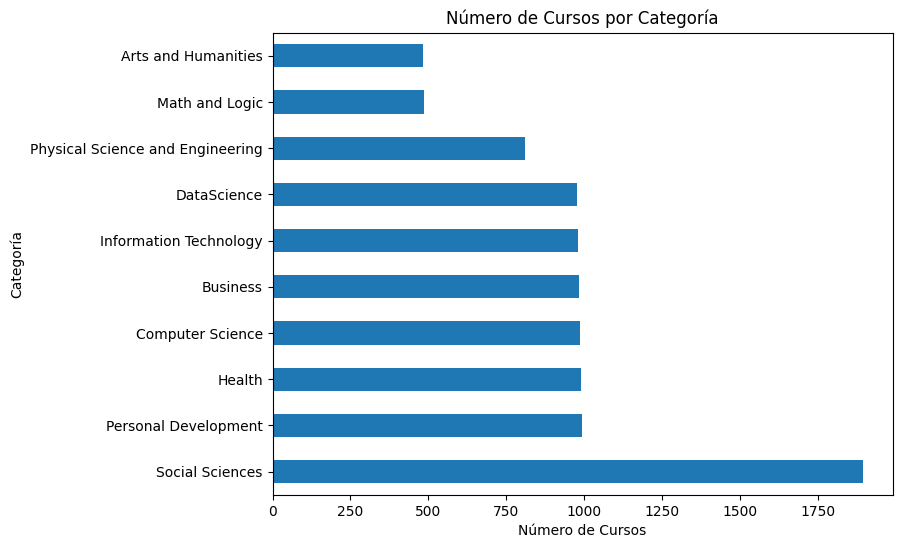

In [72]:
plt.figure(figsize=(8,6))
dataFrameCursos['Keyword'].value_counts().plot(kind='barh')
plt.title('Número de Cursos por Categoría')
plt.xlabel('Número de Cursos')
plt.ylabel('Categoría')
plt.show()

### **Conclusión (Número de Cursos por Categoría)**

La mayor parte de los cursos se encuentra en la categoría de *Social Sciences*, lo que refleja una clara prioridad en este campo. En cambio, las categorías con menos cursos son *Arts and Humanities* y *Math and Logic*. Por otro lado, *Data Science*, *Information Technology*, *Business*, *Computer Science*, *Health* y *Personal Development* tienen una cantidad de cursos similar, lo que sugiere una distribución balanceada en estas áreas.

# **Duración del Curso vs Número de Revisiones**

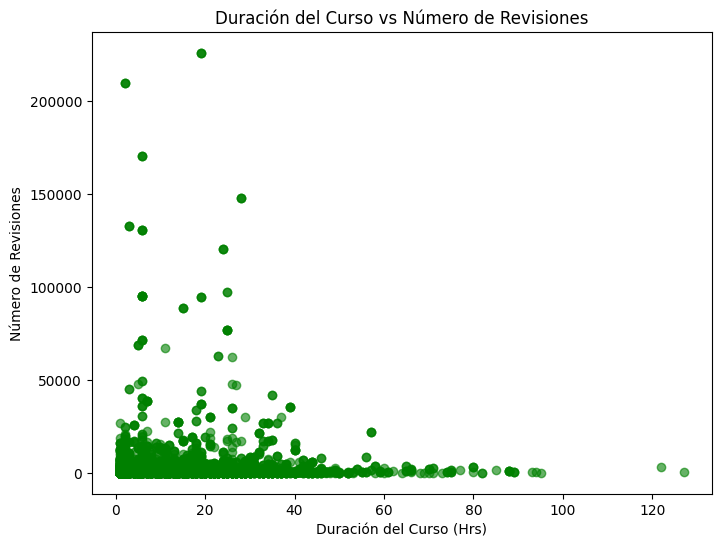

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(dataFrameCursos['Duration'], dataFrameCursos['Review'], alpha=0.6, color='green')
plt.title('Duración del Curso vs Número de Revisiones')
plt.xlabel('Duración del Curso (Hrs)')
plt.ylabel('Número de Revisiones')
plt.show()

### **Conclusión (Duración del Curso vs Número de Revisiones)**

La mayoría de las revisiones se concentra en los cursos con una duración de 0 a 20 horas, seguidos por aquellos de 20 a 40 horas. En contraste, los cursos que duran entre 80 y 120 horas tienen muy pocas revisiones, lo que podría indicar que la extensión de estos cursos reduce el interés o la disposición de los estudiantes para dejar comentarios.

# **Distribución de las Duraciones de los Cursos**

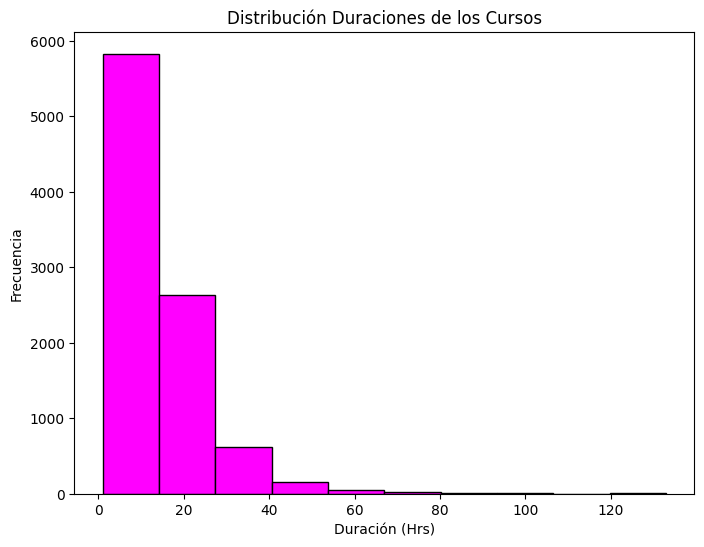

In [74]:
plt.figure(figsize=(8,6))
plt.hist(dataFrameCursos['Duration'].dropna(), bins=10, edgecolor='black', color='magenta')
plt.title('Distribución Duraciones de los Cursos')
plt.xlabel('Duración (Hrs)')
plt.ylabel('Frecuencia')
plt.show()

### **Conclusión (Distribución Duraciones de los Cursos)**

Se observa que la mayoría de los cursos se agrupan en la duración de 0 a 20 horas, casi llegando a los 6,000 cursos disponibles en esta categoría. En cambio, los cursos que duran entre 80 y 120 horas son considerablemente menos comunes, acercándose a cero, lo que sugiere que los estudiantes prefieren optar por cursos más breves.


# **Distribución de las Calificaciones de los Cursos por Nivel de Dificultad**

<Figure size 800x600 with 0 Axes>

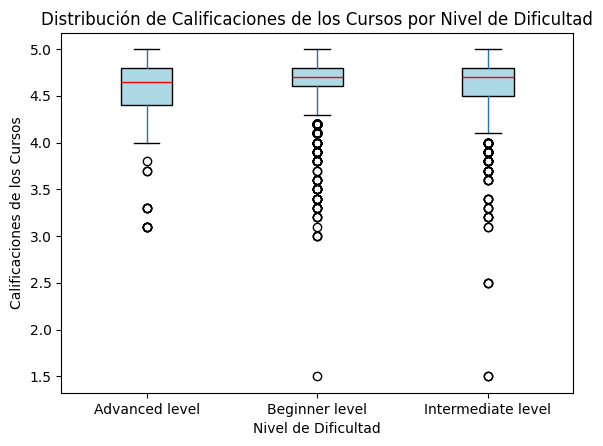

In [75]:
plt.figure(figsize=(8,6))
dataFrameCursos.boxplot(column='Rating', by='Level', grid=False, patch_artist=True, 
             boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Distribución de Calificaciones de los Cursos por Nivel de Dificultad')
plt.suptitle('') 
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Calificaciones de los Cursos')
plt.show()

### **Conclusión (Distribución de las Calificaciones de los Cursos por Nivel de Dificultad)**

Los estudiantes obtienen resultados bastante similares en los tres niveles de dificultad. Sin embargo, el nivel avanzado presenta una mayor variabilidad en las calificaciones, lo que indica que los estudiantes enfrentan desafíos más exigentes. Por otro lado, los niveles principiante e intermedio tienen distribuciones más consistentes, aunque hay algunos casos de rendimiento notablemente bajo. En general, las calificaciones de los estudiantes parecen ser consistentes, sin importar la dificultad del curso.

# **Resultados Coursera Comments.txt**

### **Sentimientos Encontrados en los Comentarios**

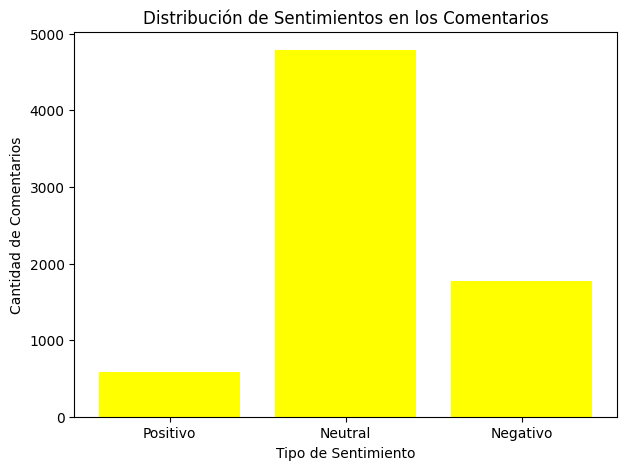

In [76]:
positive_comments = sum(1 for score in sentiment_scores if score['compound'] > 0)
neutral_comments = sum(1 for score in sentiment_scores if score['compound'] == 0)
negative_comments = sum(1 for score in sentiment_scores if score['compound'] < 0)

sentiment_dataframe = pd.DataFrame({
    'Sentimiento': ['Positivo', 'Neutral', 'Negativo'],
    'Cantidad': [positive_comments, neutral_comments,negative_comments]
})

plt.figure(figsize=(7, 5))
plt.bar(sentiment_dataframe['Sentimiento'], sentiment_dataframe['Cantidad'], color='yellow')
plt.title('Distribución de Sentimientos en los Comentarios')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

### **Conclusión (Distribución de Sentimientos en los Comentarios)**

Se identificaron alrededor de 5,000 comentarios con sentimientos neutros, mientras que los comentarios positivos son inferiores a 1,000. Asimismo, aproximadamente 2,000 comentarios exhiben sentimientos negativos. Estos hallazgos indican que la mayoría de las opiniones se inclinan hacia la neutralidad, destacando una cantidad significativa de sentimientos negativos en relación con los positivos.

### **Palabras más usadas**

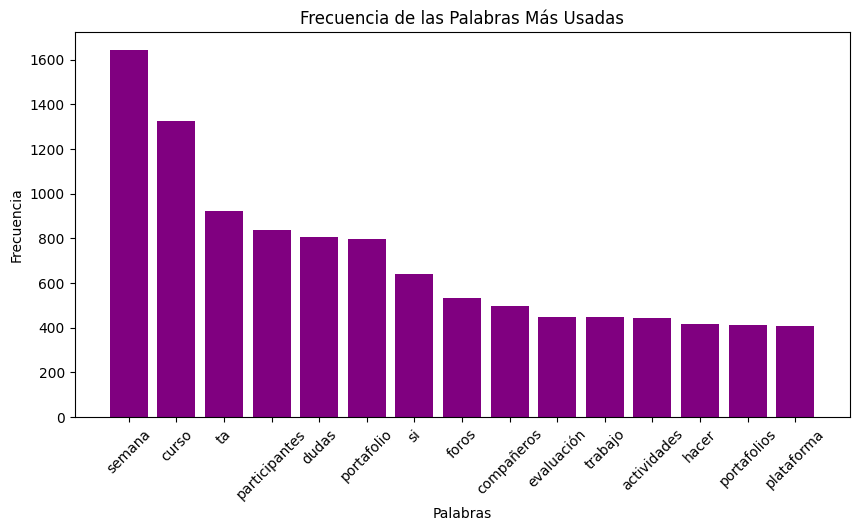

In [77]:
plt.figure(figsize=(10, 5))
plt.bar(top_words['word'], top_words['frequency'], color='purple')
plt.title('Frecuencia de las Palabras Más Usadas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### **Conclusión (Frecuencia de las Palabras Más Usadas)**

Se puede notar que las palabras más mencionadas en los comentarios de Coursera son "semana", que aparece más de 1,600 veces, y "curso", con aproximadamente 1,400 menciones. Estos hechos evidencian un énfasis significativo en la organización temporal de los cursos y su contenido, subrayando la relevancia de estos aspectos en la experiencia de aprendizaje de los estudiantes.

### **Tipos de Entidades Encontrados**

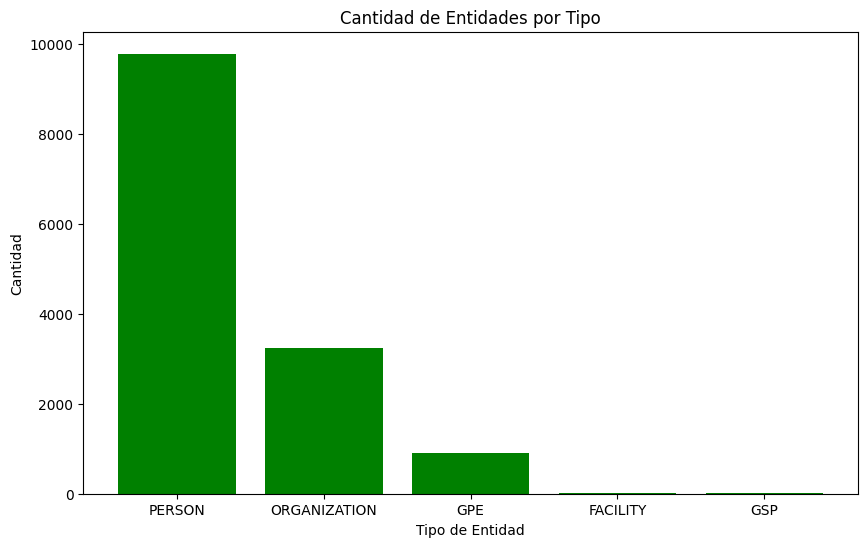

In [78]:
def generar_grafica(entidades):
    etiquetas = [etiqueta for entidad, etiqueta in entidades]
    df_etiquetas = pd.DataFrame(etiquetas, columns=['etiqueta'])

    conteo = df_etiquetas['etiqueta'].value_counts()
    etiquetas = conteo.index.tolist()  
    cantidad = conteo.values.tolist()  
    
    plt.figure(figsize=(10, 6))
    plt.bar(etiquetas, cantidad, color='green')
    plt.xlabel('Tipo de Entidad')
    plt.ylabel('Cantidad')
    plt.title('Cantidad de Entidades por Tipo')
    plt.show()

generar_grafica(entidades)

### **Conclusión (Tipos de Entidades por Cantidad)**

Se observa que la entidad más mencionada es "PERSON", con cerca de 10,000 apariciones, seguida por "ORGANIZATION", que presenta aproximadamente 4,000 menciones. En cambio, las entidades "FACILITY" y "GSP" apenas se mencionan, con casi 0 referencias. Estos resultados subrayan la preponderancia de las entidades asociadas a personas y organizaciones en el análisis llevado a cabo.

# **Conclusión general**
## **Análisis de Datos CSV (datos.csv)**

El análisis de los datos obtenidos pone de manifiesto una dinámica interesante en cómo se ofrecen y reciben los cursos en línea. Las altas calificaciones de 5.0 en ciertos programas sugieren que existen cursos bien diseñados y valiosos para los estudiantes, lo que resulta crucial para mantener su interés y motivación. Sin embargo, la presencia de calificaciones tan bajas como 1.5 genera inquietudes sobre la calidad de algunos contenidos y la competencia de los instructores, lo que indica la necesidad de realizar una revisión exhaustiva de estos cursos para detectar y corregir sus fallas.

La alta concentración en la categoría de Social Sciences refleja un interés en temas sociales, pero sería ventajoso diversificar la oferta en áreas como Arts and Humanities y Math and Logic, donde hay menos cursos disponibles. Las categorías equilibradas, como Data Science, Information Technology, Business, Computer Science, Health y Personal Development, son cruciales para el desarrollo de habilidades en el competitivo mercado laboral actual.

En cuanto a la duración de los cursos, la preferencia por aquellos de 0 a 20 horas sugiere un deseo de aprendizaje flexible. Esto pone de relieve el reto que enfrentan los cursos más largos, que podrían necesitar ajustes para atraer a más estudiantes.

Por último, aunque las calificaciones son similares en niveles de dificultad, la variabilidad en los cursos avanzados indica diferencias en las expectativas y habilidades de los estudiantes, lo que sugiere la necesidad de ofrecer apoyo adicional en estos cursos.

## **Análisis de Comentarios en Archivo de Texto Plano (Coursera Comments.txt)**

El análisis de los comentarios en Coursera proporciona información valiosa sobre las percepciones de los estudiantes respecto a los cursos ofrecidos. La alta aparición de las palabras "semana" y "curso" sugiere que los estudiantes están interesados no solo en la duración de las actividades, sino también en la organización y el contenido de los cursos. Esto destaca la necesidad de ofrecer una planificación clara y eficiente, ya que los elementos temporales son cruciales para una experiencia de aprendizaje satisfactoria.

La frecuencia de la entidad "PERSON", con casi 10,000 menciones, indica que los estudiantes a menudo mencionan a personas, como instructores, compañeros o especialistas en el tema. Esto subraya la importancia de la interacción humana en el entorno de aprendizaje en línea. En contraste, la entidad "ORGANIZATION", que aparece alrededor de 4,000 veces, sugiere que las instituciones que brindan los cursos también son un punto de interés considerable. Por otro lado, las entidades "FACILITY" y "GSP" son mencionadas con poca frecuencia, lo que podría implicar que los estudiantes priorizan las relaciones con personas y organizaciones sobre los aspectos físicos del aprendizaje.

En términos de emociones, el análisis indica que cerca de 5,000 comentarios son neutrales, lo que refleja una valoración moderada de los cursos. Sin embargo, la cantidad de comentarios negativos, cercana a 2,000, en comparación con menos de 1,000 positivos, sugiere que hay áreas de insatisfacción que deben abordarse. Esto es especialmente relevante para las instituciones, ya que implica la necesidad de identificar y mejorar los aspectos del contenido y la entrega de los cursos que no cumplen con las expectativas de los estudiantes.

# **Conclusión sobre el Uso de Python en el Análisis de Datos**

En la actualidad, Python se ha consolidado como una de las herramientas más influyentes en el campo del análisis de datos. Su diseño intuitivo y la riqueza de bibliotecas disponibles, como Pandas, NumPy y Matplotlib, han simplificado enormemente el proceso de manipulación y visualización de datos, lo que permite a los analistas manejar grandes volúmenes de información de manera fluida.

La versatilidad de Python va más allá de la simple gestión de datos; ofrece también poderosas capacidades para realizar análisis estadísticos y aplicar técnicas de minería de datos. Herramientas como NLTK (Natural Language Toolkit) facilitan el análisis de texto, permitiendo a los profesionales explorar y extraer información significativa de datos no estructurados, como comentarios de usuarios en plataformas educativas como Coursera.

El uso de NLTK es especialmente relevante en el análisis de sentimientos y en la clasificación de texto, herramientas que pueden ofrecer una visión clara sobre la satisfacción del usuario y las tendencias emergentes en el ámbito del aprendizaje en línea. La habilidad de Python para integrar diversas tecnologías lo convierte en un recurso valioso en un mundo cada vez más interconectado.